# TP Json et API
## I Le format Json
Le format [JSON](https://fr.wikipedia.org/wiki/JavaScript_Object_Notation) (JavaScript Object Notation) est un format de données structurées très utilisé sur Internet.
Conçu dans les années 2000 initialement pour le langage JavaScript il est maintenant utilisé dans de nombreux langages pour stocker des données.
Le contenu d'un fichier Json ressemble fortement à la définition d'un dictionnaire en Python. Comme dans l'exemple qui suit ou à un tableau de dictionnaire comme dans l'exercice suivant.
### Exercice 1

1/ Ouvrez le fichier joint `exemple_json.json` puis exécutez le code de la cellule.


In [ ]:
import json

def charger_json( nom_fich ) :
    """Charge le fichier nom_fich et retourne une structure
    de données Python
    """
    with open(nom_fich,"r", encoding="utf-8") as donnees_json:

        return  json.load(donnees_json)

donnees_json = charger_json( "./exemple_json.json")
         
donnees_json

Vous devez constater que `donnees_json`  est un dictionnaire de dictionnaire.

Les clés du dictionnaire sont des prénoms. Elles permettent d'accèder à un dictionnaire qui contient les clés "Nom", "Email", "Age" et "Ville".

In [ ]:
donnees_json['Pierre'] # Renvoie le dictionnaire associé à la clé 'Pierre"

In [ ]:
donnees_json['Pierre']['Email'] # Renvoie l'email de Pierre

2/ Compléter afin d'obtenir l'âge d'Agathe

3/ Compléter afin de créer un tableau `tab_prenom` contenant la liste des prénoms.

In [ ]:
tab_prenoms = []
for prenom in donnees_json.keys():
    tab_prenoms.append(prenom)
tab_prenoms

4/ Compléter afin de créer un tableau `tab_emails` contenant la liste des emails.

In [ ]:
tab_emails = []
for ... in donnees_json.keys():
    tab_emails.append(donnees_json[...]['...'])
    
tab_emails

### Exercice 2

1/ Ouvrez le fichier joint `exemple_json2.json` puis exécutez le code de la cellule.


In [ ]:
donnees_json2 = charger_json( "./exemple_json2.json")
donnees_json2 

Vous devez contatez que `donnes_json2` est un tableau de dictionnaire.

Chaque élément du tableau est un dictionnaire dont les clés sont "Prenom", "Nom", "Age" et "Ville".

In [ ]:
donnees_json2[1] # Retourne le deuxième dictionnaire contenu dans ce tableau

Les éléments du tableau `donnees_json2` sont des dictionnaires dont les clés sont "Prenom", "Nom", "Email" et "Ville".

In [ ]:
donnees_json2[0]['Prenom'] # Retourne le prénom du premier élément du tableau

2/ Compléter afin de retourner l'émail de Gérard qui est l'élément d'indice 3 dans le tableau `donnees_json2`

3/ Compléter afin d'obtenir un tableau `tab_emails2` des emails.

In [ ]:
tab_emails2 = []
for elem in donnees_json2:
    tab_emails2.append(elem['...'])
tab_emails2

## II API
Une  API (Application Programmation Interface) permet d'intégrer une application à une autre. Par exemple, de demander ou d'écrire des données structurées à un site Web et de les exploiter de façon automatisée dans un programme.

![API]( 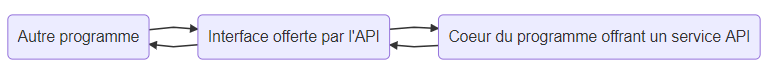) 

### Exercice 3
Le but est de localiser le lieu qui se trouve sous l'ISS en utilisant l'API fourni par [https://wheretheiss.at/w/developer](https://wheretheiss.at/w/developer) 

1/ Exécutez le code des deux cellules suivantes:

In [ ]:
import requests # Module pour faire des requêtes
import json    # Permet de manipuler les fichiers Json

url_iss = "https://api.wheretheiss.at/v1/satellites/25544"
# Fait une requête get vers l'adresse contenu dans url_iss
reponse_iss = requests.get(url_iss) 
# Met au format json la réponse à la requête
donnees_iss = reponse_iss.json()

In [ ]:
donnees_iss

2/ Compléter le code afin que les variables `lat_iss` et `long_iss` contient respectivement la latitude et la longitude de l'Iss.

*Remarque:* Les fonctions du module folium utilisent des arguments optionnels par mot-clés. La syntaxe est `mot-cle=argument`. 

In [ ]:
import folium # Module permettant d'afficher des cartes issues d'OpenStreetMap
lat_iss = donnees_iss['latitude']
long_iss = donnees_iss['longitude']
# Créer m  un objet carte centré sur les coordonnées données en paramètres
# Avec un zoom initial de 4.
m = folium.Map(location=(lat_iss,long_iss),zoom_start = 4) 
coords = (lat_iss,long_iss)
# Ajoute un marqueur au point de coordonnées coords avec le message popup
# lors que l'on clique dessus.
folium.Marker(coords, popup="Don't look up!", tooltip="Cliquez !").add_to(m)
# Affiche la carte (map en anglais)
m

3/ Compléter le code suivant afin d'avoir 10 marqueurs à des positions successives de l'Iss.
Pour cela, vous devrez faire 10 requêtes pour obtenir la position en attendant 2 secondes entre chaque.

Pour cela, comme dans la question précédente,vous créez une carte centrée dans la première position retournée et l'on met le marqueur correspondant. 
Ensuite vous attendez 2 secondes pour faire une nouvelle requête et ajouter un marqueur. Ceci 9 fois de suite.
Enfin vous affichez la carte.

**Attention** ce serveur n'accepte pas plus d'une requête par seconde pour une même adresse IP. Dans l'étalissement,  devez exécuter cette cellule les uns après les autres.

In [ ]:
import requests, json, folium, time
url_iss = "https://api.wheretheiss.at/v1/satellites/25544"
reponse_iss = requests.get(url_iss) 
donnees_iss = reponse_iss.json()
coords = (donnees_iss['latitude'],donnees_iss['longitude'])
m = folium.Map(location = coords,zoom_start = 4, control_scale= True) 

folium.Marker(coords).add_to(m)

for _ in range(...):
    time.sleep(2) # Fait attendre le programme 2 secondes
    reponse_iss = requests.get(...) 
    donnees_iss = ...
    coords = (..., ...)
    folium.Marker(coords).add_to(m)
    
m 

### Exercice 4
Le but est d'écrire un programme qui affiche la carte correspondant à une adresse donnée. Pour cela, vous allez utiliser l'API adresse de data.gouv.fr.
Vous trouverez la documentation [ici](https://adresse.data.gouv.fr/api-doc/adresse).

1/ Cliquez sur le lien et observez ce que la recherche de l'adresse du lycée retourne:

[https://api-adresse.data.gouv.fr/search/?q=27,+rue+du+chateau+Landon,+75010](https://api-adresse.data.gouv.fr/search/?q=27,+rue+du+chateau+Landon,+75010)

*Remarque:* L'adresse a été codée pour faire partie d'une URL. On voit que les espaces ont été remplacés par des '+'.

2/ Exécutez la cellule. Pour que l'adresse soit convertie dans l'URL, on la donne comme paramètre comme dans cette cellule.

In [ ]:
import requests, json
url_adresse = "https://api-adresse.data.gouv.fr/search/"
adresse = { 'q' : '27, rue du chateau Landon, 75010'}
reponse_adresse = requests.get(url_adresse, params=adresse)
donnees_adresse = reponse_adresse.json()
donnees_adresse 

3/ La latitude et la longiture correspondent à la clé 'coordinates'.

Exécutez la cellule suivante. En vous aidant ce qu'elle retourne, complétez la cellule pour qu'elle renvoie la latitude et la longitude.

In [ ]:
donnees_adresse['features'][0]

In [ ]:
donnees_adresse['features'][0]['...']['...']

4/ Compléter la cellule suivante pour qu'elle retourne une carte centrée sur le lycée.

**Attention** les coordonnées sont dans l'ordre longitute, latitude alors que folium utilise l'ordre latitude, longitude.

In [ ]:
import requests, json, folium
url_adresse = "https://api-adresse.data.gouv.fr/search/"
adresse = { 'q' : '27, rue du chateau Landon, 75010'}
reponse_adresse = requests.get(url_adresse, params=adresse)
donnees_adresse = reponse_adresse.json()
long, lat = ...
coords = ( ..., ... ) 
m = folium.Map(location = coords, zoom_start = 20)
folium.Marker(coords).add_to(m)
m

### Exercice 5
Le but de cet exercice est d'afficher le temps à Paris en utilisant l'API de 
[https://fr.wttr.in/paris](https://fr.wttr.in/paris)

1/ Cliquez sur: [https://fr.wttr.in/paris?format=j1](https://fr.wttr.in/paris?format=j1) 

Observez ce qui est retourné par cette requête.

Si besoin, la documentation de l'API se trouve ici [https://github.com/chubin/wttr.in](https://github.com/chubin/wttr.in). 

2/ Complétez la cellule puis exécutez là afin qu'elle affiche le contenu de la clé 'current_conditon' des données provenant de la requête

In [ ]:
import requests, json
url_meteo = "https://fr.wttr.in/paris?format=j1"
reponse_meteo = requests.get(url_meteo)
donnees_meteo = reponse_meteo.json()
donnees_meteo['current_condition']

3/Vous avez du constatez que la structure retournée est complexe.Comme elle est entourée de crochets, il s'agit d'un tableau ne contenant qu'un élément. Pour se simplifier les notation nous n'allons utiliser la variable `meteo_actuelle` qui ne contient que le dictionnaire contenu dans ce tableau.


In [ ]:
meteo_actuelle = donnees_meteo['current_condition'][0]
meteo_actuelle

4/ Compléter les  cellules afin qu'elles retournent la température en Celsius 'temp_C', la température ressentie en Celsius 'FeelsLikeC' et la description en français qui est la clé value du tableau associé à la clé 'lang_fr'

In [ ]:
meteo_actuelle['...']

In [ ]:
meteo_actuelle['...']

In [ ]:
meteo_actuelle['...'][...]['...']

5*/ Question difficile. Compléter afin d'obtenir la description en français en utilisant uniquement la variable `donnees_meteo` 

In [ ]:
donnees_meteo['...'][...]['...'][...]['...']

6/ Complétez cette fonction pour qu'elle renvoie un tuple contenant la température, la température ressentie et la description.

In [ ]:
import requests, json
def meteo_paris():
    url_meteo = "https://fr.wttr.in/paris?format=j1"
    reponse_meteo = requests.get(url_meteo)
    donnees_meteo = reponse_meteo.json()
    meteo_actuelle = donnees_meteo['current_condition'][0]
    ...
    ...
    ...
    return (..., ..., ...)
   

In [ ]:
t, tr, descr = meteo_paris()

ch = "Actuellement à Paris il fait " + t + "C. "
ch = ch + "La température ressentie est de "  + tr + "C. "
ch = ch + "Le temps est " + descr
print(ch)